## Slike so razdeljene v dve mapi: tiste z legendo in tiste brez.

In [19]:
import cv2 as cv
import os

def naloziSlike(mapa):
    images = []
    for filename in os.listdir(mapa):
        img = cv.imread(os.path.join(mapa, filename))
        if img is not None:
            images.append(img)
    return images

#Nalozimo slike
slike = naloziSlike("slike")
slike_z_legendo = naloziSlike("slike_z_legendo")

print (slike[0].shape)
print (slike[1].shape)
#Slike niso iste velikosti

(749, 1117, 3)
(745, 1115, 3)


## Okvirili bomo predmet na sredini slike in odrezali stran robove, zato da bomo lahko potem slike skalirali na enako velikost.

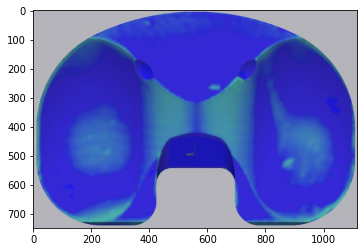

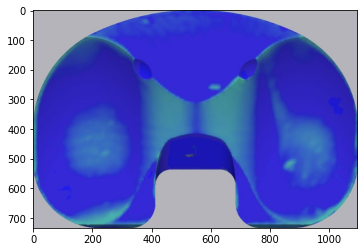

In [20]:
import matplotlib.pyplot as plt

def print_img_notebook(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    # as opencv loads in BGR format by default, we want to show it in RGB.
    plt.show()

# Funkcija, ki odstrani rob sliki
def remove_border(img):
    grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresholded = cv.threshold(grayscale, 127, 255, cv.THRESH_BINARY_INV)
    bbox = cv.boundingRect(thresholded)
    x, y, w, h = bbox
    # print(bbox)
    foreground = img[y:y+h, x:x+w]
    return foreground

# Funkcija, ki sliki odstrani legendo (100px širok navpičen pas na desni...)
def odstrani_legendo(img):
    # Odstrani 100px navpicni pas na desni strani, kjer je legenda.
    return img[:,:len(img[1]) - 100]

print_img_notebook(slike[0])
# V to spremenljivko bomo dali slike brez robov
slike_no_border = []
# Prvo vse slike brez legende
for slika in slike:
    slike_no_border.append(remove_border(slika))
# In še slike z legendo
for slika in slike_z_legendo:
    slika = odstrani_legendo(slika)
    slike_no_border.append(remove_border(slika))
print_img_notebook(slike_no_border[0])

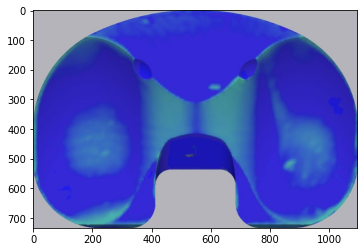

In [21]:
import numpy as np

# Vse slike naredimo velikosti enake velikosti prve slike. Pomembno je samo, da so vse enake velikosti
visina = len(slike_no_border[0]) # visina prve slike
sirina = len(slike_no_border[0][0]) # sirina prve slike
for i in range(len(slike_no_border)):
    slike_no_border[i] = cv.resize(slike_no_border[i], (sirina, visina))
print_img_notebook(slike_no_border[0])

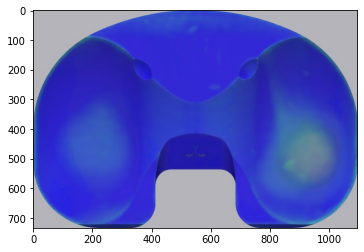

True

In [22]:
# Funkcija, ki slike združi. Vsaka slika prispeva 1/število_slik zaključeni sliki. Povprečje slik torej.
def blend(list_images): # Blend images equally.
    equal_fraction = 1.0 / (len(list_images)) # Zračunamo kolikšen delež naj vsaka prispeva
    output = np.zeros_like(list_images[0]) # Inicializiramo matriko, ki predstavlja sliko z nulami, velikosti kot ena od slik
    for img in list_images:
        output = output + img * equal_fraction # Za vsako sliko matriki prištejemo vrednosti treh komponent barv Red, Green in Blue, pomnoženo s prej izračunanim razmerjem
    output = output.astype(np.uint8)
    return output

result = blend(slike_no_border)
print_img_notebook(result)
cv.imwrite("zdruzeno.png", result)